In [ ]:
from scipy.io import loadmat
from scipy.signal import find_peaks
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def RMS (Senal):
    len(Senal)
    rms = np.sqrt(np.mean(np.square(Senal)))
    return rms
print (RMS(ECG_sinFiltro))



4392.9682937490725


dict_keys(['__header__', '__version__', '__globals__', 'Fs', 'ECG_asRecording', 'ECG_filtered', 'EMG_filtered1', 'EMG_filtered2', 'EMG_asRecording1', 'EMG_asRecording2'])
[0.00000000e+00 9.76562500e-04 1.95312500e-03 ... 2.99970703e+01
 2.99980469e+01 2.99990234e+01]


<ipython-input-81-2f0a20132e06>:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  time = np.arange(0,(1/fs)*len(ECG_sinFiltro),1/fs)


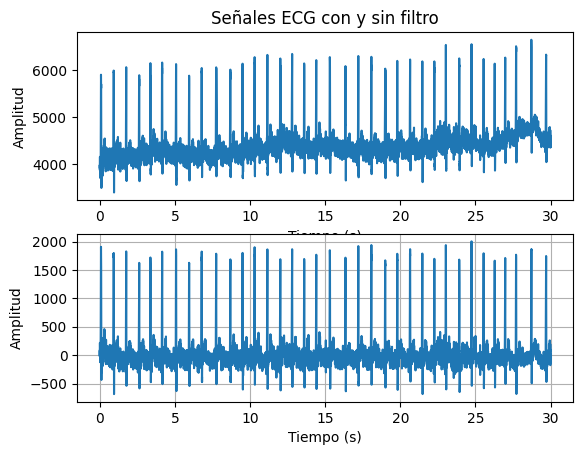

In [ ]:
data = loadmat('signals.mat')
print(data.keys())
fs = data["Fs"]
ECG_sinFiltro = data['ECG_asRecording'][0]
ECG_conFiltro = data['ECG_filtered'][0]
time = np.arange(0,(1/fs)*len(ECG_sinFiltro),1/fs)
print(time)

plt.figure(1)
plt.subplot(2,1,1)
plt.plot(time,ECG_sinFiltro)
plt.xlabel('Tiempo (s)')
plt.title('Señales ECG con y sin filtro')
plt.ylabel('Amplitud')

plt.subplot(2,1,2)
plt.plot(time,ECG_conFiltro)
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')

plt.grid(True)
plt.show()


In [ ]:
Picos=find_peaks(ECG_conFiltro,height=1200)
print(Picos)
periodo=np.diff(Picos[0])
print(periodo)




(array([   88,   952,   959,  1806,  2683,  2693,  3454,  3464,  4247,
        4256,  5201,  6090,  6096,  6942,  6950,  7929,  7936,  8892,
        8901,  9727,  9733, 10548, 10554, 11417, 11424, 12304, 13104,
       13111, 13930, 13938, 14748, 14756, 15678, 16743, 17619, 18501,
       18508, 19446, 19453, 20273, 20279, 21140, 21148, 21974, 21981,
       22798, 22804, 23582, 24493, 24502, 25325, 25331, 26156, 26903,
       26911, 27619, 27627, 28365, 29407, 29413, 30406, 30414]), {'peak_heights': array([1906.72609523, 1794.5044897 , 1790.54611609, 1826.40200918,
       1571.89799856, 1624.62444371, 1719.04582229, 1600.60801792,
       1712.85867646, 1821.89934977, 1862.6246152 , 1625.70586812,
       1609.8238582 , 1722.22599073, 1823.3752855 , 1783.0926595 ,
       1785.51276054, 1670.34675213, 1686.10401647, 1649.14726502,
       1800.13347128, 1767.65697667, 1899.49853986, 1797.23228064,
       1861.69112637, 1688.34355533, 1814.59774765, 1864.71029913,
       1693.09551952, 1635.0